Analyzing Sales Data Project

This project involves analyzing Amazon sales data to gain insights into sales performance,
identify trends, and make data-driven business decisions. Here's a step-by-step guide:

Problem Definition
Objective: Analyze Amazon sales data to understand sales trends, identify top-performing products, and optimize inventory and marketing strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load a CSV file then creating a dataframe
df = pd.read_csv("/content/amazon.csv")

1- Data Collection

The dataset we'll be using has information on over 1000 products sold by Amazon, like their names, categories, prices, ratings, and reviews.digging into this data and figuring out what it all means, and how we can use it to help Amazon and its customers. So, we're going to be exploring this dataset, doing some cool data analysis and visualization, and even building a recommendation system based on the data.

Features

product_id - Product ID

product_name - Name of the Product

category - Category of the Product

discounted_price - Discounted Price of the Product

actual_price - Actual Price of the Product

discount_percentage - Percentage of Discount for the Product

rating - Rating of the Product

rating_count - Number of people who voted for the Amazon rating

about_product - Description about the Product

user_id - ID of the user who wrote review for the Product

user_name - Name of the user who wrote review for the Product

review_id - ID of the user review

review_title - Short review

review_content - Long review

img_link - Image Link of the Product

product_link - Official Website Link of the Product

In [ ]:
# Let's have a look on top 5 rows of the data
df.head()

2- Data preparation

Before we dive into the data analysis and visualization, we need to make sure our dataset is clean and properly formatted. This process is called data preparation, and it involves several steps:

2.1 Data Inspection: We'll start by inspecting the dataset to see if there are any missing values, duplicates, or inconsistent data. We'll also check if the data types are correct and make sure the dataset is ready for analysis.

2.2 Data Cleaning: Next, we'll clean the dataset by removing or correcting any errors, inconsistencies, or irrelevant information. This will make the dataset more reliable and accurate.

2.3 Data Transformation: After cleaning the dataset, we may need to transform the data to make it more useful for analysis. This can include scaling, normalization, or feature engineering.

2.4 Data Saving: Once we've prepared the data, we'll save it in a new file to avoid overwriting the original dataset. This way, we can always go back to the original dataset if we need to.

By following these steps, we can ensure that our data is clean, accurate, and ready for analysis!

In [ ]:
# check the number of rows and columns
df.shape

(1465, 16)

To remove rows with missing information, we'll use the dropna() function. We only want to keep rows with all the required information because missing values can affect the accuracy of our analysis. In this case, we will remove the two rows that contain blank values for rating_count.

In [ ]:
# Check for missing values
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
df[df.rating_count.isnull()]

In [ ]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=['rating_count'], inplace=True)
print(check_missing_values(df))

In [ ]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [ ]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


Some variables in a dataset may have an object data type, which means they are strings. In order to perform numerical analysis on these variables, we need to convert them to numeric values. For example, if we want to calculate the total price of all products, we cannot do so if the price variable is in object format. We need to convert it to a numeric data type first.

In [ ]:
# Convert string data type to int in order to perform numerical analysis
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%','').astype(float)/100

In [ ]:
# The rating column has a value with an incorrect character, so we will exclude
# the row to obtain a clean dataset.
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].str.contains('\|').sum()
print(f"Total de linhas com '|' na coluna 'rating': {count}")

Total de linhas com '|' na coluna 'rating': 1
Total de linhas com '|' na coluna 'rating': 0


In [ ]:
df['rating'] = df['rating'].astype(str).str.replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [ ]:
print(check_data_types(df))

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


Now that we have adjusted the data types, let's create one more colum that could be interesting to have in our database. "rating_weighted" because it can be created as a way of considering not only the average rating, but also the number of people who rated the product. This column weighs the average rating by the number of ratings, giving more weight to ratings with a large number of raters. This can help identify products with high customer satisfaction and many positive ratings compared to products with high average ratings but few raters.

In [ ]:
# Creating the column "rating_weighted"
df['rating_weighted'] = df['rating'] * df['rating_count']

Extracting both the main and final categories from the category column is important because it provides us with a clearer picture of how our products are distributed across different categories. By identifying the main category, we can understand the broader classification of the product, while the final category tells us more specifically what the product is.

For example, if we have a main category of "Electronics" and a final category of "Smartphones", we know that this product falls under the larger umbrella of electronics and is specifically a smartphone. This information can be helpful in understanding the distribution of our products and identifying trends and patterns within specific categories.

Additionally, extracting both main and final categories can also help with data visualization and communication. We can use these categories to create more informative and concise charts and tables that show the distribution of products by category more clearly.

Overall, extracting both main and final categories is an important step in our exploratory data analysis process that helps us gain a better understanding of our data and make more informed decisions.

In [ ]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_weighted',
       'sub_category', 'main_category'],
      dtype='object')

In [ ]:
len(df)

1462

In [ ]:
df.head()

3- Exploratory Data Analysis (EDA) + Data visualization

In this step, we'll become data detectives and do some exploratory data analysis. We'll take a closer look at our data to understand how our products are distributed across categories, what the customer ratings look like, and what customers are saying in their reviews.

3.1 Analyze the distribution of products by category using a bar plot.

3.2 Analyze the distribution of customer ratings using a histogram.

3.3 Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.

3.4 Perform statistical analysis to identify any correlations between different features, such as the relationship between product price and customer rating.

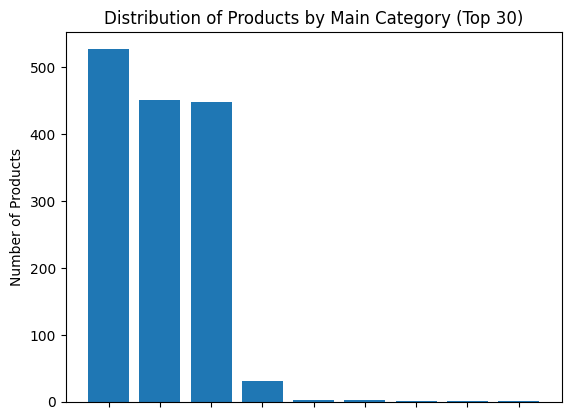

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [ ]:
import matplotlib.pyplot as plt

#3.1
# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:30] # Select only the top 30 main categories.
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Main Category (Top 30)')
plt.xticks(range(len(main_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 main categories
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index=False))

Based on the results, we can gather the following insights:

The top three main categories are Electronics, Computers & Accessories, and Home & Kitchen. This shows that these categories are popular among customers.

The number of products in the other main categories is quite low, indicating that these categories are not as popular as the top three.

Office Products, Musical Instruments, Home Improvement, Toys & Games, Car & Motorbike, and Health & Personal Care have a very small number of products, which may suggest that these categories have less demand.

Overall, the data can help businesses understand the current market trends and identify potential opportunities for growth in specific categories.

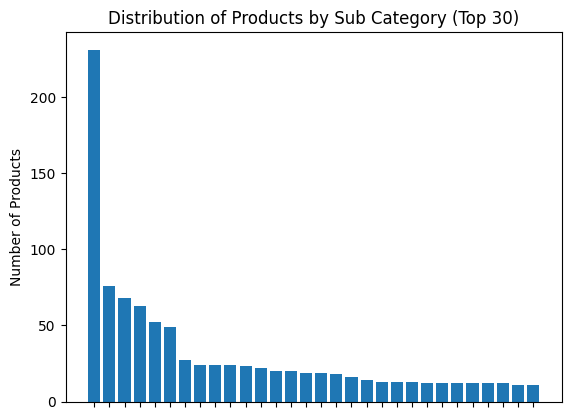

Top 30 sub categories:
            Sub Category  Number of Products
               USBCables                 231
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

In [ ]:
# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30] # Select only the top 30 last categories.
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number of Products')
plt.title('Distribution of Products by Sub Category (Top 30)')
plt.xticks(range(len(sub_category_counts)), '') # hide X-axis labels
plt.show()

# Top 30 sub categories
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index=False))

Based on the results, we can gather the following insights:

The top six subcategories are USB cables, smartwatches, smartphones, smart televisions, in-ear headphones, and remote controls. These are the most popular subcategories, and businesses could focus on providing products in these categories to attract customers.

Other popular subcategories include mixer grinders, HDMI cables, dry irons, mice, and instant water heaters. These subcategories may be less popular than the top six, but they still have a significant number of products, indicating that there is demand for them.

The data shows that there is a diverse range of subcategories in the top 30, including kitchen appliances, home electronics, and personal accessories. This highlights the importance of offering a variety of products to cater to different customer needs and preferences.

Overall, the data can help businesses identify the most popular subcategories and adjust their product offerings to meet customer demand. By focusing on these subcategories, businesses could increase their sales and improve their competitiveness in the market.

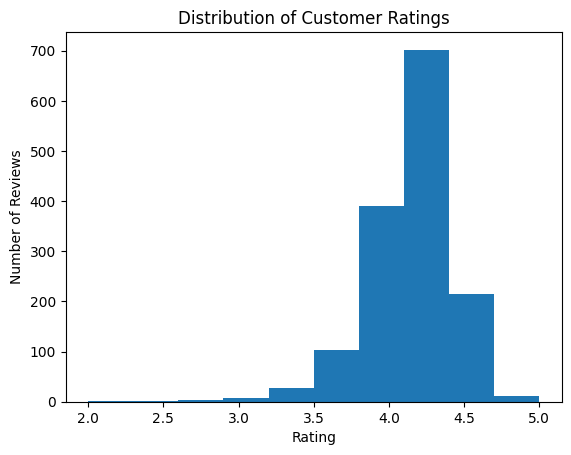

In [ ]:
# 3.2 Analyze the distribution of customer ratings using a histogram.
# Plot histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

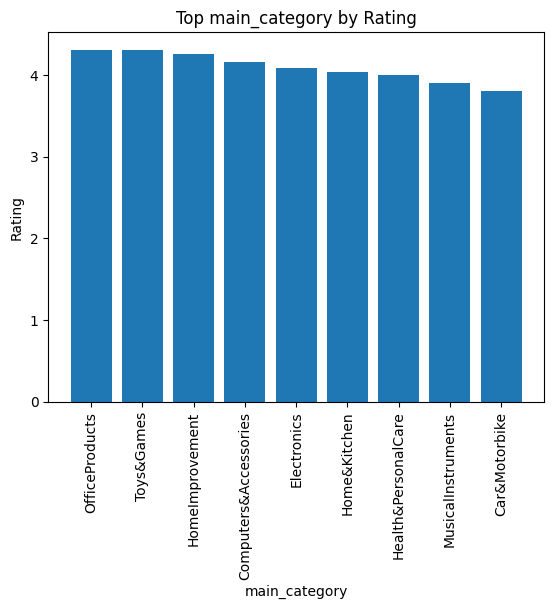

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [ ]:
# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

Looking at this table, we can see the main categories ranked by their average rating.

The main categories with the highest ratings are Office Products, Toys & Games, and Home Improvement, with ratings above 4.0.This suggests that customers are generally satisfied with the products offered in these categories.

On the other hand, the main categories with lower ratings are Car & Motorbike, Musical Instruments, and Health & Personal Care, with ratings below 4.0.This could indicate areas where improvements could be made to better meet customer expectations.

Additionally, we can see that Computers & Accessories and Electronics have ratings above 4.0, which indicates that these categories are popular and well-liked by customers who purchase them.

Overall, this table provides valuable insights into the performance of different main categories and can help businesses make informed decisions to improve their offerings and satisfy their customers.

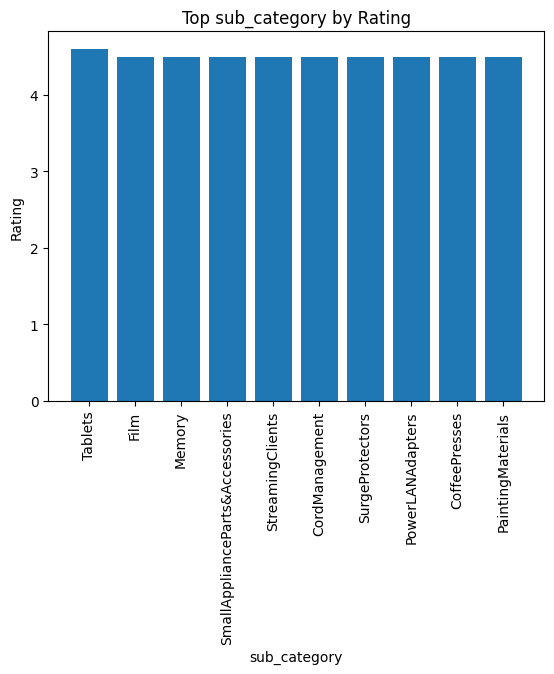

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


In [ ]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

Looking at the table, we can see the top and bottom sub-categories in terms of customer ratings.

It's great to see that the "Tablets" sub-category is at the top with a rating of 4.6, which indicates that customers are satisfied with their purchase.

However, there are some sub-categories at the bottom, such as "DustCovers" and "ElectricGrinders", which have lower ratings, implying that customers are not very happy with these products.

Insights like these can help businesses focus on improving the quality of their products and enhancing the overall customer experience. It's important to keep track of customer feedback to identify areas for improvement and continue to meet their needs and expectations.

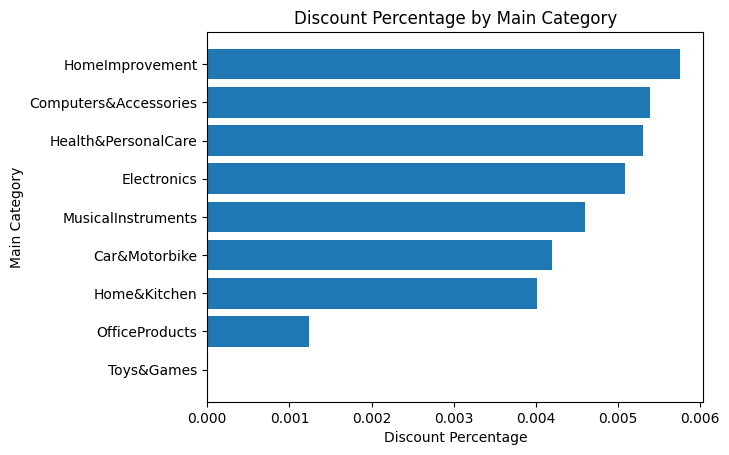

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.001235
2           Home&Kitchen                  0.004017
3          Car&Motorbike                  0.004200
4     MusicalInstruments                  0.004600
5            Electronics                  0.005083
6    Health&PersonalCare                  0.005300
7  Computers&Accessories                  0.005392
8        HomeImprovement                  0.005750


In [ ]:
# sort the means in descending order
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

The table above shows the mean discount percentage by main category, sorted in descending order.

The category with the lowest mean discount percentage is Toys&Games, with a value of 0.0. This may indicate that the demand for toys and games is high enough that retailers do not need to offer significant discounts to sell products in this category.

Home&Kitchen and Car&Motorbike have similar mean discount percentages, with values of 0.401745 and 0.42, respectively. This suggests that there may be a similar level of competition and price sensitivity in these two categories.

The categories with the highest mean discount percentages are HomeImprovement, Computers&Accessories, and Electronics, with values of 0.575, 0.539202, and 0.508289, respectively. This may indicate that these categories are more price-sensitive, and retailers need to offer attractive discounts to compete effectively.

It's also interesting to note that OfficeProducts and Health&PersonalCare have mean discount percentages of 0.123548 and 0.53, respectively, which are in between the categories with the lowest and highest mean discount percentages. This suggests that these categories may have some level of price sensitivity, but not to the same extent as HomeImprovement, Computers&Accessories, and Electronics.

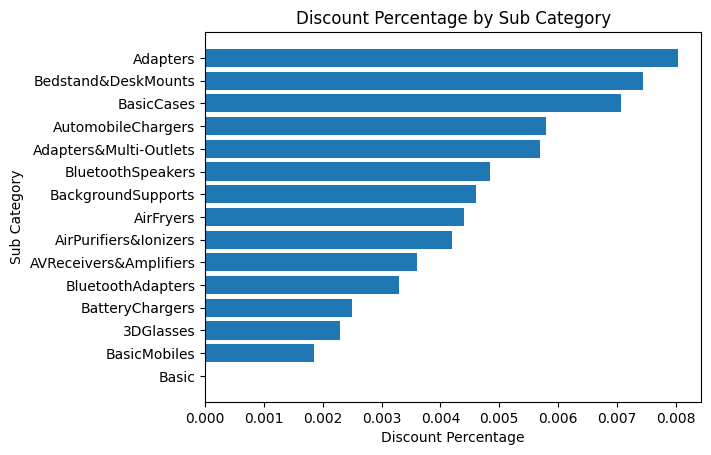

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                  0.001856
2                3DGlasses                  0.002300
3          BatteryChargers                  0.002500
4        BluetoothAdapters                  0.003300
5   AVReceivers&Amplifiers                  0.003600
6    AirPurifiers&Ionizers                  0.004200
7                AirFryers                  0.004400
8       BackgroundSupports                  0.004600
9        BluetoothSpeakers                  0.004850
10  Adapters&Multi-Outlets                  0.005700
11      AutomobileChargers                  0.005800
12              BasicCases                  0.007075
13     Bedstand&DeskMounts                  0.007450
14                Adapters                  0.008033


In [ ]:
# sort the means in descending order
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Discount Percentage by Sub Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})

print(table)

The table above shows the mean discount percentage by subcategory, sorted in descending order.

The subcategory with the lowest mean discount percentage is Basic, with a value of 0.0. This may indicate that basic products, which are typically low-cost and simple, do not need to be discounted heavily to attract buyers.

BatteryChargers, 3DGlasses, and BasicMobiles are examples of subcategories with moderate mean discount percentages, with values between 0.18 and 0.25. This suggests that these products may be somewhat price-sensitive, but not to the same extent as the products in the higher mean discount percentage subcategories.

BluetoothSpeakers, Bedstand&DeskMounts, and BasicCases are subcategories with high mean discount percentages, with values between 0.485 and 0.745. This suggests that these products may be more price-sensitive than others, and that retailers may need to offer attractive discounts to compete effectively in these subcategories.

The subcategory with the highest mean discount percentage is Adapters, with a value of 0.803333. This indicates that the competition for these products is high, and that retailers must offer significant discounts to attract buyers.

Overall, this table shows that the mean discount percentage varies significantly across different subcategories, and that retailers need to carefully consider their pricing and discount strategies for each subcategory to effectively compete in the marketplace

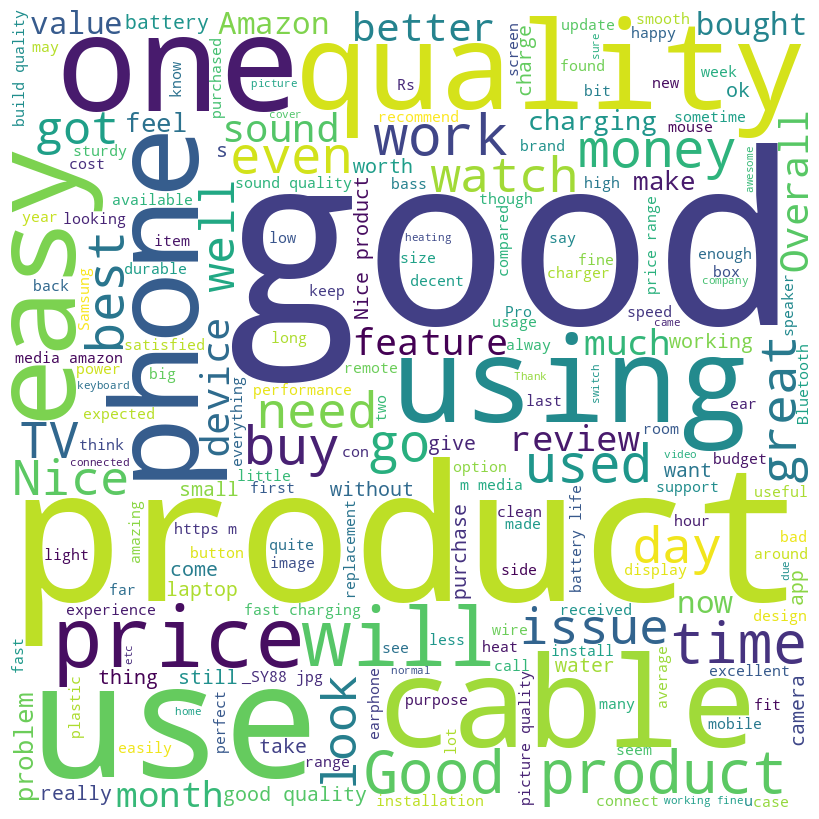

In [ ]:
from wordcloud import WordCloud

# 3.3 Analyze the reviews by creating word clouds or frequency tables of the most common words used in the reviews.
reviews_text = ' '.join(df['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

The code generates a word cloud based on the reviews text in the dataset, allowing us to visually analyze the most common words used in the reviews. The larger the word in the cloud, the more frequently it appears in the reviews. This can provide insights into the overall sentiment of the customers, the most frequently mentioned product features or issues, and other important information that can help businesses improve their products and services. In the following example, you can see the word cloud for products with a rating greater than 4

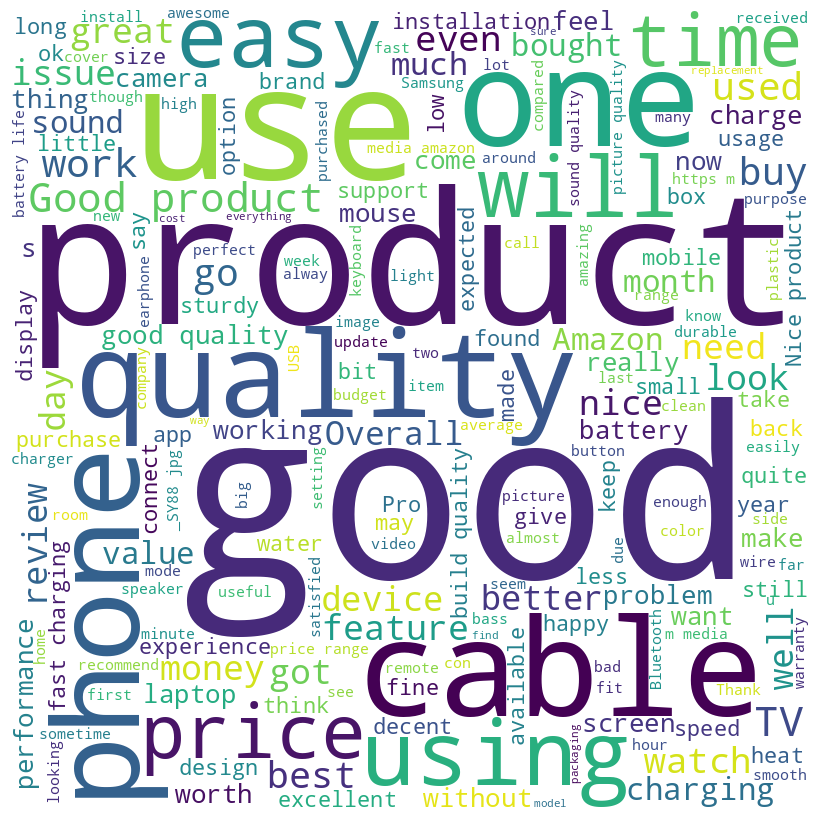

In [ ]:
# Filter the dataframe to include only products with a rating lower than 2
low_rating_df = df[df['rating'] > 4.0]

# Create a string of all the reviews for these products
reviews_text = ' '.join(low_rating_df['review_content'].dropna().values)

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews_text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# 3.4 Perform statistical analysis to identify any correlations between different features, such as the relationship between product price and customer rating.
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix)

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961910            -0.242298   
actual_price                 0.961910      1.000000            -0.117855   
discount_percentage         -0.242298     -0.117855             1.000000   
rating                       0.121132      0.122467            -0.155679   
rating_count                -0.027304     -0.036215             0.011294   
rating_weighted             -0.027039     -0.035959             0.010701   

                       rating  rating_count  rating_weighted  
discounted_price     0.121132     -0.027304        -0.027039  
actual_price         0.122467     -0.036215        -0.035959  
discount_percentage -0.155679      0.011294         0.010701  
rating               1.000000      0.102235         0.115217  
rating_count         0.102235      1.000000         0.999061  
rating_weighted      0.115217      0.999061         1.000000  


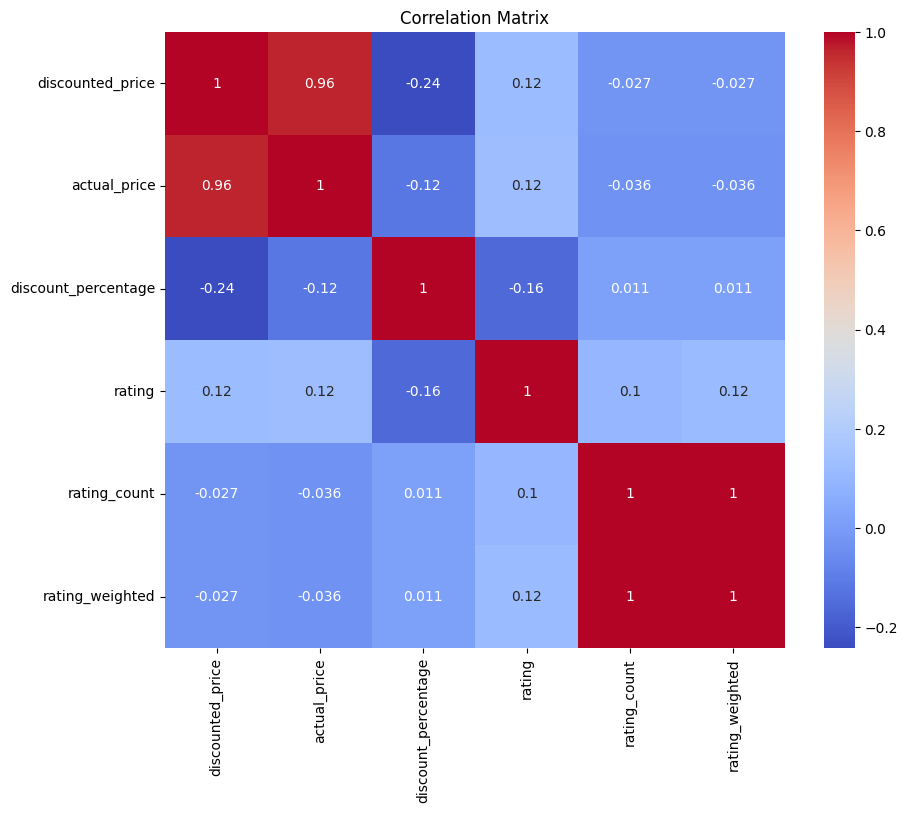

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

So, we have here a correlation table between some variables of our dataset.

we can see a weak positive correlation between the overall rating and both the rating count and the weighted rating. This suggests that products with higher ratings tend to have more reviews and higher weighted ratings.

There is a moderate positive correlation (0.121) between the "rating" and "discounted_price" variables, indicating that customers may be more likely to rate a product higher if it is discounted.

It's important to note that correlation doesn't necessarily imply causation, but these insights can help us understand the relationships between different features in our data.

The ideal proportion to consider a positive correlation as weak, moderate, or strong depends on the field of study and the specific research question. However, a general rule of thumb is:

A correlation coefficient (r) between 0.1 and 0.3 indicates a weak positive correlation. A correlation coefficient (r) between 0.3 and 0.5 indicates a moderate positive correlation. A correlation coefficient (r) greater than 0.5 indicates a strong positive correlation. Keeping in mind that this is just a general guideline and other factors such as sample size, measurement errors, and outliers should also be taken into account when interpreting correlation coefficients.